Sentiment evaluation on twitter dataset

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"

In [ ]:
!kaggle datasets download -d kazanova/sentiment140!

403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
!unzip kazanova/sentiment140!.zip

unzip:  cannot find or open kazanova/sentiment140!.zip, kazanova/sentiment140!.zip.zip or kazanova/sentiment140!.zip.ZIP.


In [ ]:

! unzip kazanova/sentiment140!

unzip:  cannot find or open kazanova/sentiment140!, kazanova/sentiment140!.zip or kazanova/sentiment140!.ZIP.


In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('ab (1).csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1029,0,1468064699,Mon Apr 06 23:31:25 PDT 2009,NO_QUERY,mars__,@nicolerichie yes! we had the VHS. i cried whe...
671,0,1467982039,Mon Apr 06 23:06:29 PDT 2009,NO_QUERY,TeresaUlring,"@emitstop So true, I have it and don't use it"
130,0,1467841897,Mon Apr 06 22:27:56 PDT 2009,NO_QUERY,aaronrothe,@chelserlynn haha its so cooooold in the d! an...
848,0,1468021282,Mon Apr 06 23:18:00 PDT 2009,NO_QUERY,sfpoetic,"Well, that sucked."
235,0,1467872355,Mon Apr 06 22:35:52 PDT 2009,NO_QUERY,bigwillthechamp,@MyConnecticut Restaurant called WoodNTap has ...


In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 1071


In [ ]:
df. shape

(1071, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1071 non-null   int64 
 1   ids     1071 non-null   int64 
 2   date    1071 non-null   object
 3   flag    1071 non-null   object
 4   user    1071 non-null   object
 5   text    1071 non-null   object
dtypes: int64(2), object(4)
memory usage: 50.3+ KB


In [ ]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1071


In [ ]:
df['target'].unique()

array([0, 4])

In [ ]:
df['target'].nunique()

2

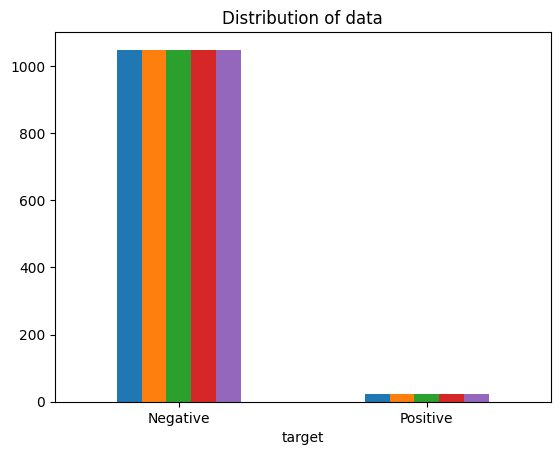

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

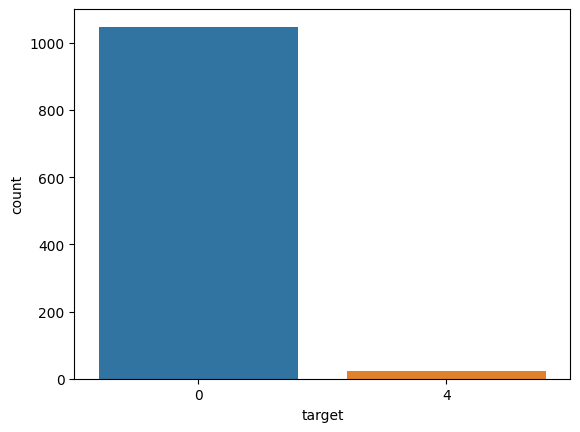

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
data=df[['text','target']]

In [ ]:
data['target'] = data['target'].replace(4,1)

<ipython-input-40-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data['target'].unique()

array([0, 1])

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

1043                                     i hate tuesdays 
1044    @gracedent it's her &quot;hair&quot; i can't d...
1045    feel like i'm stuck in a rut. waiting to hear ...
1046         i need new glasses...mines is hangnon 1 arm 
1047            meat week day 3: tummy hurts every night 
Name: text, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
                 "youve", 'your', 'yours', 'yourself', 'yourselves']

<Axes: title={'center': 'Ratio of sentiment label'}, ylabel='Counts'>

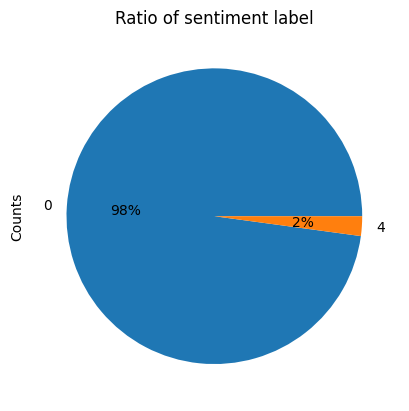

In [ ]:
df.groupby(['target']).size().plot(kind='pie',ylabel='Counts', autopct='%1.0f%%', title='Ratio of sentiment label')

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

1048                 holy 12 fucking days till see callum
1049                  @sonnycentral thank you! great day!
1050    @jonathanrknight sense humor one friends...lov...
1051    i'm eating cheezits...with two flavors! sharp ...
1052    tgif snitches!!....kids acting chill...its pay...
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

1043                                        hate tuesdays
1044                 gracedent its quothairquot cant deal
1045    feel like im stuck rut waiting hear back schoo...
1046                  need new glassesmines hangnon 1 arm
1047              meat week day 3 tummy hurts every night
Name: text, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

1043                                        hate tuesdays
1044                 gracedent its quothairquot cant deal
1045    feel like im stuck rut waiting hear back schoo...
1046                   need new glassesmines hangnon1 arm
1047              meat week day 3 tummy hurts every night
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

1043                                        hate tuesdays
1044                 gracedent its quothairquot cant deal
1045    feel like im stuck rut waiting hear back schoo...
1046                   need new glassesmines hangnon1 arm
1047              meat week day 3 tummy hurts every night
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

1043                                        hate tuesdays
1044                 gracedent its quothairquot cant deal
1045    feel like im stuck rut waiting hear back schoo...
1046                    need new glassesmines hangnon arm
1047               meat week day  tummy hurts every night
Name: text, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

1048        []
1049        []
1050        []
1051    [w, w]
1052        []
Name: text, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

1048        []
1049        []
1050        []
1051    [w, w]
1052        []
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

1048        []
1049        []
1050        []
1051    [w, w]
1052        []
Name: text, dtype: object

In [ ]:
X=data.text
y=data.target

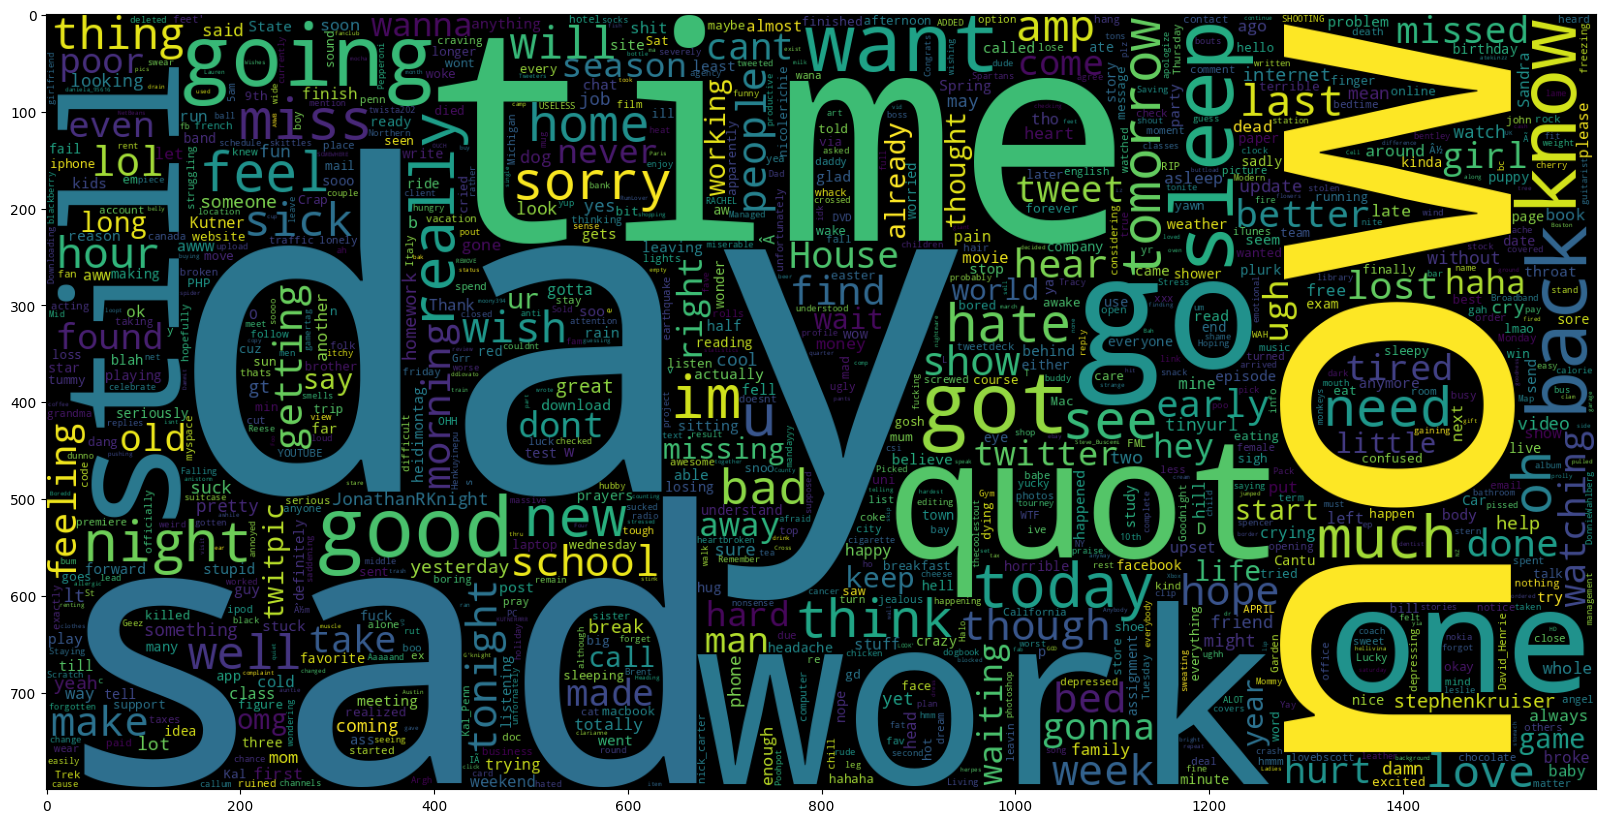

In [ ]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =211)

In [ ]:
def model_Evaluate(model):
 # Predict values for Test dataset
 y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
 print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
 cf_matrix = confusion_matrix(y_test, y_pred)
 categories = ['Negative','Positive']
 group_names = ['True Neg','False Pos', 'False Neg','True Pos']
 group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
 labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
 labels = np.asarray(labels).reshape(2,2)
 sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
 xticklabels = categories, yticklabels = categories)
 plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
 plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
 plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Fucntion to calculate the score and confusion matrix to print
def metrixAndScoring(test, pred, fold=0):
    if fold:
        return [fold, precision_score(test, pred), recall_score(test, pred), f1_score(test, pred), accuracy_score(test, pred), roc_auc_score(test, pred)]
    else:
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        fpr, tpr, _ = roc_curve(test, pred)
        roc_auc = auc(fpr, tpr)

        # Compute micro-average ROC curve and ROC area
        fpr, tpr, _ = roc_curve(test.ravel(), pred.ravel())
        roc_auc = auc(fpr, tpr)
        f, axs = plt.subplots(1,3,figsize=(10,4),sharey=True)
        f.tight_layout()
        plt.subplot(1, 2, 1)
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic curve')
        plt.legend(loc="lower right")
        plt.subplot(1, 2, 2)
        class_names = [0,1]
        # Confusion Matrix Display
        cf_matrix = confusion_matrix(test, pred)
        group_names = ["True Neg","False Pos","False Neg","True Pos"]
        group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        s = sns.heatmap(cf_matrix, annot=labels,fmt='')
        s.set_title("Confusion metric")
        plt.show()
        s.set(ylabel='True labels', xlabel='Predicted labels')
        return [precision_score(test, pred), recall_score(test, pred), f1_score(test, pred), accuracy_score(test, pred), roc_auc_score(test, pred)] + group_percentages


from sklearn.inspection import permutation_importance

# function to calculate feature importance
def variableImportance(model, X, y, reg):
    plt.figure(figsize=(20,5))
    # plot feature importance
    if reg:
        feat_importances = pd.Series(model.coef_[0], index=X.columns)
        f, axs = plt.subplots(1,2,figsize=(20,5),sharey=True)
        f.tight_layout()
        plt.subplot(1, 2, 1)
        feat_importances.nlargest(50).plot(kind='bar')
        plt.title("Variable predicting class 1 (Target = 1)")
        plt.xlabel("Number of variables")
        plt.ylabel("Score")
        plt.xticks(fontsize=10)
        plt.subplot(1, 2, 2)
        feat_importances.nsmallest(50).plot(kind='bar')
        plt.title("Variable predicting class 0 (Target = 0)")
        plt.xlabel("Number of variables")
        plt.ylabel("Score")
        plt.xticks(fontsize=10)
        plt.show()
    else:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        # plt.bar([x for x in range(len(importance))], importance)
        feat_importances.nlargest(100).plot(kind='bar')
        plt.title("Variable importance with positive effect (Target = 1)")
        plt.xlabel("Number of variables")
        plt.ylabel("Score")
        plt.xticks(fontsize=10)


AllScores = []
def fittingModel(name, model, x_train, x_test ,y_train, y_test):
    # fitting the data to the given model
    model.fit(x_train, y_train)
    # displaying the interpretated values
    returnValues = [name]+metrixAndScoring(y_test, model.predict(x_test))
    AllScores.append(returnValues)
    display(pd.DataFrame([[returnValues[1], returnValues[2], returnValues[3], returnValues[4], returnValues[5]]], columns=['Precision', 'Recall', 'F1', 'Accuracy', 'ROC AUC Score']).round(2))
    return model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
text_data = ['Is stressing out because my blackberry keeps flashing a red alert status for no reason!! Its faking me out and I hate it!!!',
             # Add more text data here...
            ]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data into numerical features
X = tfidf_vectorizer.fit_transform(text_data)

In [ ]:
import sklearn.feature_extraction.text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
X_train_tfidf = vectoriser.fit_transform(X_train)
feature_names = vectoriser.get_feature_names_out()

print('No. of feature_words:', len(feature_names))

No. of feature_words: 13025


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
 # Predict values for Test dataset
 y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
 print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
 cf_matrix = confusion_matrix(y_test, y_pred)
 categories = ['Negative','Positive']
 group_names = ['True Neg','False Pos', 'False Neg','True Pos']
 group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
 labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
 labels = np.asarray(labels).reshape(2,2)
 sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
 xticklabels = categories, yticklabels = categories)
 plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
 plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
 plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

BNB

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       0.00      0.00      0.00         4

    accuracy                           0.93        54
   macro avg       0.46      0.50      0.48        54
weighted avg       0.86      0.93      0.89        54



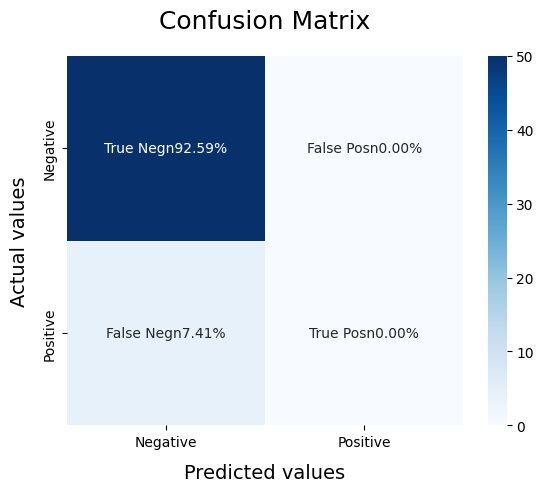

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

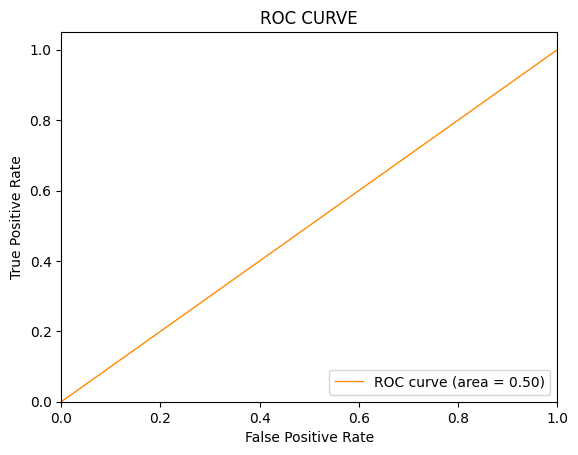

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()



Linear SVC

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       0.00      0.00      0.00         4

    accuracy                           0.93        54
   macro avg       0.46      0.50      0.48        54
weighted avg       0.86      0.93      0.89        54



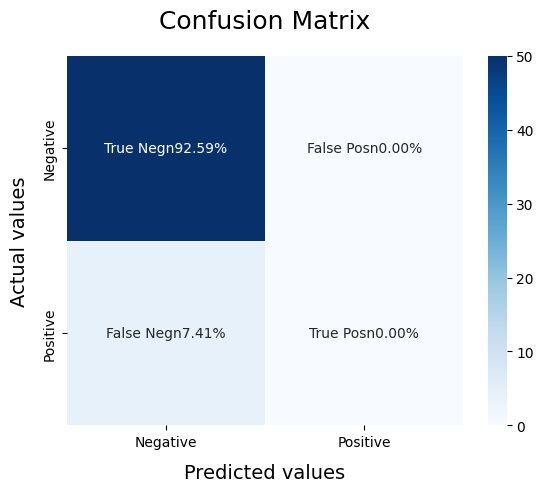

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

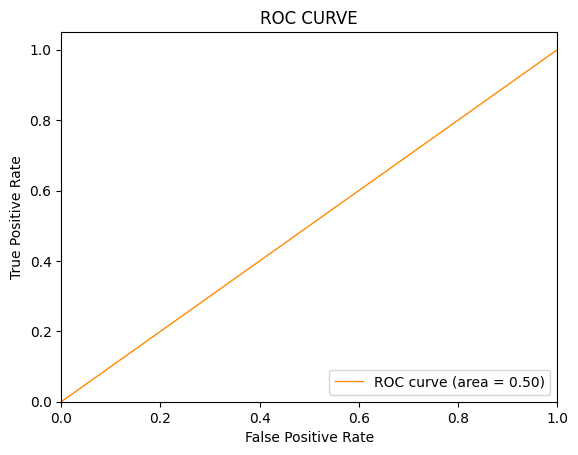

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       0.00      0.00      0.00         4

    accuracy                           0.93        54
   macro avg       0.46      0.50      0.48        54
weighted avg       0.86      0.93      0.89        54



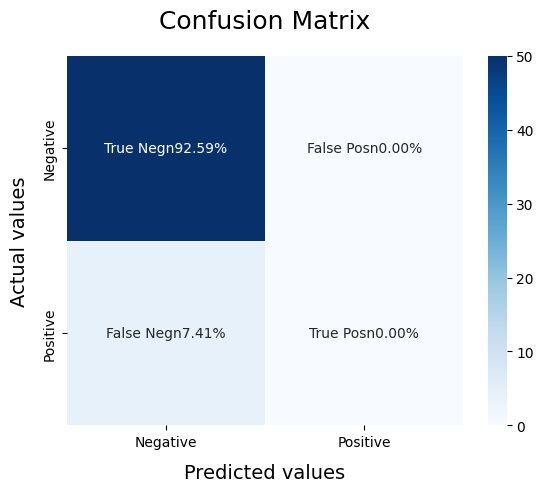

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

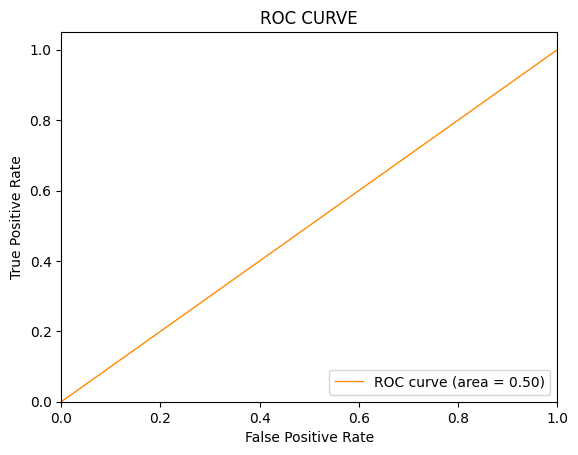

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
print('Random forest tfidf accuracy %s' % accuracy_score(y_pred_rf, y_test))

Random forest tfidf accuracy 0.9259259259259259


In [ ]:
scores_dict_tfid = {}

In [ ]:
scores_dict_tfid['Random Forest(tfid)'] = accuracy_score(y_pred_rf, y_test)

<Axes: >

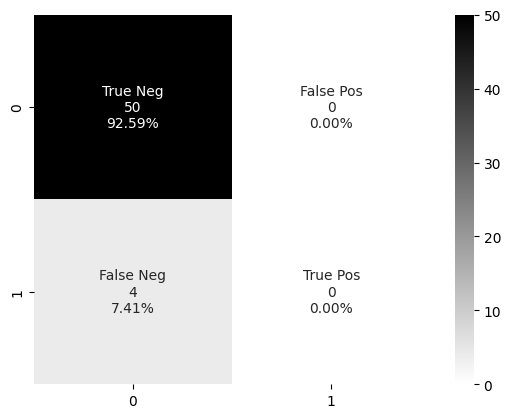

In [ ]:
cf_matrix_model = confusion_matrix(y_test, y_pred_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_model.flatten()/np.sum(cf_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_model, annot=labels, fmt='', cmap='binary')

Multinomial Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Naive bayes using Tf-idf features

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred_nb, y_test))

naive bayes tfidf accuracy 0.9259259259259259


In [ ]:
scores_dict_tfid['Multinomial Naive Bayes(Tfid)'] = accuracy_score(y_pred_nb, y_test)

<Axes: >

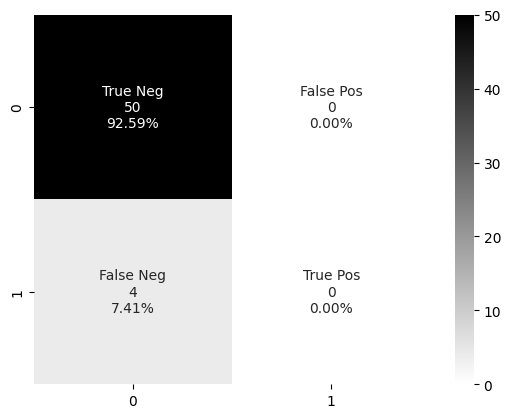

In [ ]:
cf_matrix_model = confusion_matrix(y_test, y_pred_nb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_model.flatten()/np.sum(cf_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_model, annot=labels, fmt='', cmap='binary')

Step-10: Model Evaluation
Upon evaluating all the models, we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

F1-score: The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

AUC Score: All three models have the same ROC-AUC score.

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

In our problem statement, Logistic Regression follows the principle of Occam’s Razor, which defines that for a particular problem statement, if the data has no assumption, then the simplest model works the best. Since our dataset does not have any assumptions and Logistic Regression is a simple model. Therefore, the concept holds true for the above-mentioned dataset.